In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = "2010-01-01"
end = "2019-12-31"

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

NameError: name 'data' is not defined

In [188]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.738731
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.122368
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.095360
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.517342
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.039894


In [189]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [190]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


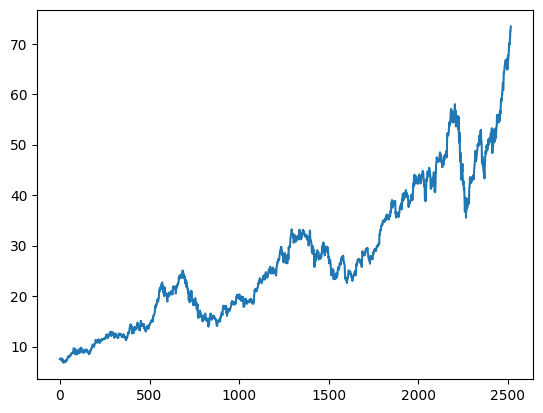

In [191]:
plt.plot(df.Close)

In [192]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

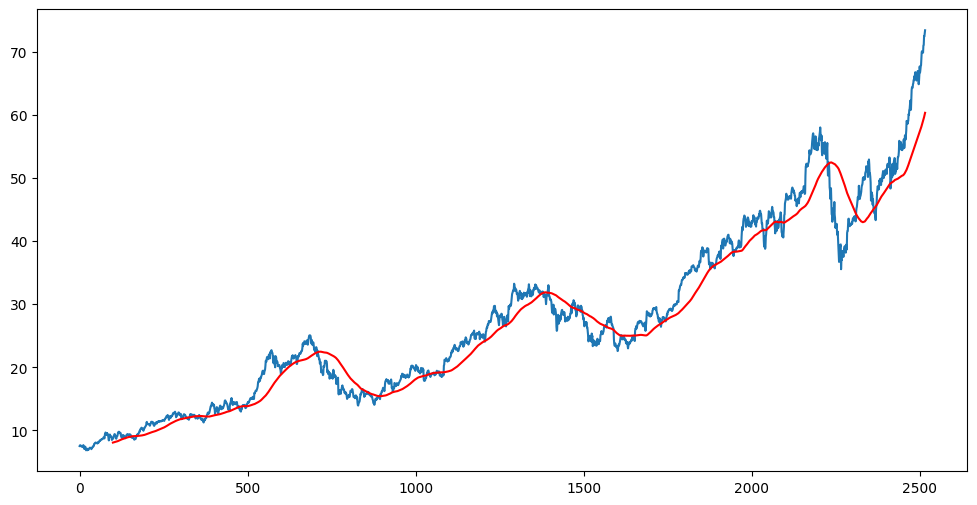

In [193]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r') #r is red colour

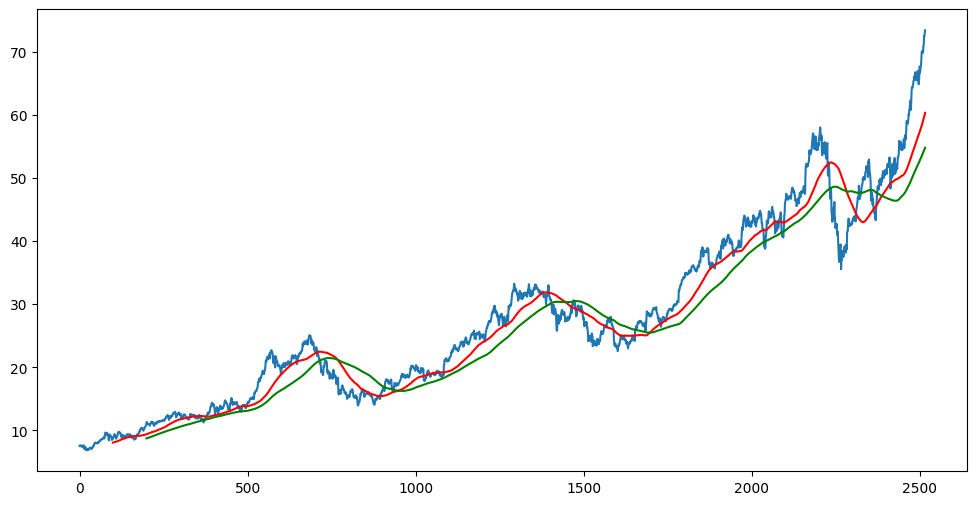

In [194]:
ma200=df.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))

plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g') 

In [195]:
df.shape

(2517, 5)

In [196]:
#Spiliting data into training and texting
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)  

(1761, 1)
(756, 1)


In [197]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [198]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))



In [200]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [201]:
data_training_array.shape

(1761, 1)

In [202]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train),np.array(y_train)

In [203]:
x_train.shape

(1661, 100, 1)

In [204]:
#ML Model

from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential


In [205]:
model= Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu',return_sequences=True))

model.add(Dropout(0.5))
          

model.add(Dense(units=1))

In [206]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 100, 120)         

In [207]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 20s 283ms/step - loss: 0.1183
Epoch 2/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0769
Epoch 3/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0734
Epoch 4/50
52/52 [==============================] - 16s 311ms/step - loss: 0.0726
Epoch 5/50
52/52 [==============================] - 16s 304ms/step - loss: 0.0712
Epoch 6/50
52/52 [==============================] - 15s 283ms/step - loss: 0.0698
Epoch 7/50
52/52 [==============================] - 14s 276ms/step - loss: 0.0698
Epoch 8/50
52/52 [==============================] - 13s 249ms/step - loss: 0.0689
Epoch 9/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0687
Epoch 10/50
52/52 [==============================] - 12s 230ms/step - loss: 0.0682
Epoch 11/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0675
Epoch 12/50
52/52 [==============================] - 12s 234ms/step - loss: 0.0673
Epoch 13/50
5

In [226]:
model.save('keras_model.h5')


In [227]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [228]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [229]:
past_100_days=data_training.tail(100)

In [230]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Snehal\AppData\Local\Temp\ipykernel_1304\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [231]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [232]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [233]:
input_data.shape

(856, 1)

In [234]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [235]:
x_test, y_test= np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [236]:
#Making predictions
y_predicted = model.predict(x_test)



24/24 [==============================] - 2s 87ms/step


In [237]:
y_predicted.shape

(756, 100, 1)

In [238]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [239]:
y_predicted

array([[[0.4928149 ],
        [0.51506615],
        [0.51737523],
        ...,
        [0.506747  ],
        [0.5067502 ],
        [0.5067533 ]],

       [[0.49282557],
        [0.51507413],
        [0.5173805 ],
        ...,
        [0.5067502 ],
        [0.5067533 ],
        [0.50675607]],

       [[0.49280596],
        [0.51505804],
        [0.5173685 ],
        ...,
        [0.5067533 ],
        [0.50675607],
        [0.50675833]],

       ...,

       [[0.49548525],
        [0.5175395 ],
        [0.51943946],
        ...,
        [0.51546776],
        [0.5155003 ],
        [0.51553464]],

       [[0.49554133],
        [0.5176017 ],
        [0.5194917 ],
        ...,
        [0.5155003 ],
        [0.51553464],
        [0.51557094]],

       [[0.4956339 ],
        [0.5176741 ],
        [0.5195444 ],
        ...,
        [0.51553464],
        [0.51557094],
        [0.5156094 ]]], dtype=float32)

In [240]:
scaler.scale_

array([0.02099517])

In [241]:
scale_factor=1/0.02099517
y_predicted= y_predicted * scale_factor
y_test = y_test * scale_factor

ValueError: x and y can be no greater than 2D, but have shapes (756,) and (756, 100, 1)

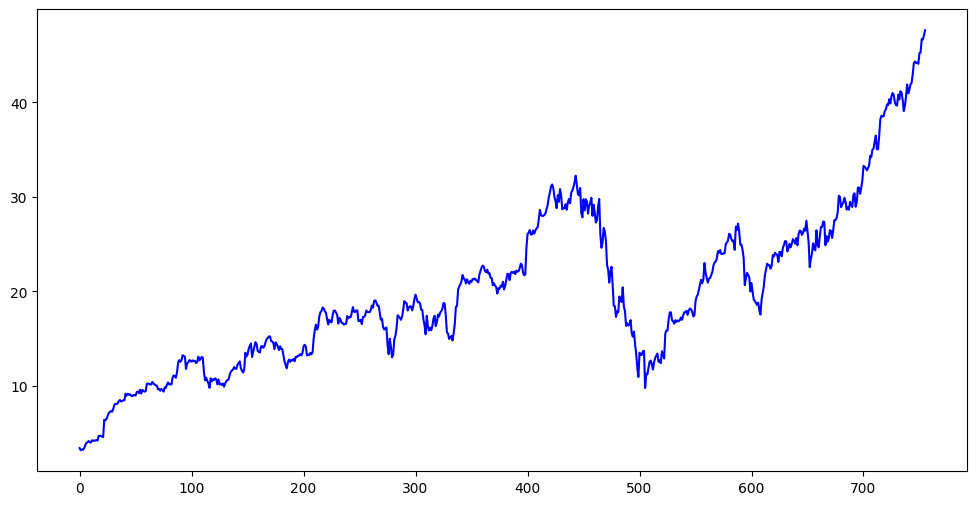

In [242]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')

plt.xlabel("Time")
plt.ylabel('Price')
plt.legend()
plt.show()
